The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
length: 0.03 m
width: 0.005 m
height: 0.0025 m
ramp location: [0.02099655] m
force location: 0.021828861641294175 m
angle in: 15.395395395395395 deg
angle out: [69.6996997] deg
deflection: 0.00225 m


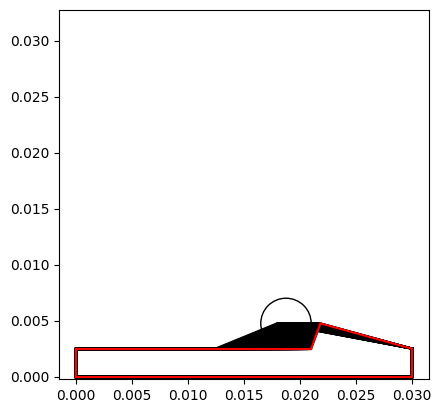

In [2]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np
import sympy as sy
from matplotlib import pyplot as plt

def find_closest_index(array, n, t):
    # Convert array to a NumPy array if it's not already one
    array = np.asarray(array)
    
    # Calculate absolute differences between array elements and target number n
    differences = np.abs(array - n)
    
    # Find indices where the difference is within the threshold t
    within_threshold_indices = np.where(differences <= t)[0]
    
    # If no values are within the threshold, return None
    if len(within_threshold_indices) == 0:
        return None
    
    # Find the index of the minimum difference within the threshold
    closest_index = within_threshold_indices[np.argmin(differences[within_threshold_indices])]
    
    return within_threshold_indices

# elastic_modulus = 2900e6
# width_beam = 1e-2
# length_beam = 10e-2
# height_beam = 0.5e-2
# deflection = length_beam * 0.1
# friction_coefficient = 0.5

elastic_modulus = 2900e6
width_beam = 0.5e-2
length_beam = 3e-2
height_beam = 0.25e-2
deflection = length_beam * 0.075
friction_coefficient = 0.5
diameter_pin = 5e-2

I_beam = (width_beam * height_beam**3) / 12
angle_in_deg = np.linspace(10,80,1000)
angle_in_rad = np.deg2rad(angle_in_deg)
force_in_desired = 22.241 / 2
force_out_desired = force_in_desired * 2
force_threshold_in = 0.25 * force_in_desired
force_threshold_out = 0.25 * force_out_desired
force_twist_desired = (2.26 / diameter_pin) / 2

extra_bit = (friction_coefficient * np.cos(angle_in_rad) + np.sin(angle_in_rad)) / (friction_coefficient * np.sin(angle_in_rad) + np.cos(angle_in_rad))
# extra_bit = (friction_coefficient + np.tan(angle_in_rad))
calculated_force_in = ((3 * elastic_modulus * I_beam) / (length_beam - (deflection / np.tan(angle_in_rad)))**3) * deflection * extra_bit

id_in = find_closest_index(calculated_force_in, force_in_desired, force_threshold_in)
the_force_in = calculated_force_in[id_in]
the_angle_in_deg = angle_in_deg[id_in]
the_angle_in_rad = angle_in_rad[id_in]
force_location = length_beam - deflection / np.tan(the_angle_in_rad)

# calculated_force_out = ((3 * elastic_modulus * I_beam) / (force_location)**3) * deflection * (friction_coefficient + np.tan(angle_in_rad))

force_location = length_beam - deflection / np.tan(the_angle_in_rad)
# ramp_location = force_location - deflection / np.tan(the_angle_out_rad)

# # Plotting if desired
# plt.figure()
# plt.plot(angle_in_deg,calculated_force_in,'black')
# # plt.plot(angle_in_deg,calculated_force_out,'red')
# plt.scatter(the_angle_in_deg,the_force_in,c='red')

the_force_out = np.zeros((len(force_location),1))
the_angle_out_deg = np.zeros((len(force_location),1))
the_angle_out_rad = np.zeros((len(force_location),1))
ramp_location = np.zeros((len(force_location),1))
small_angle = np.zeros((len(force_location),1))
for i in range(0,len(the_angle_in_rad)):

    extra_bit = (friction_coefficient * np.cos(angle_in_rad) + np.sin(angle_in_rad)) / (friction_coefficient * np.sin(angle_in_rad) + np.cos(angle_in_rad))
    # extra_bit = (friction_coefficient + np.tan(angle_in_rad))

    calculated_force_out = ((3 * elastic_modulus * I_beam) / (force_location[i])**3) * deflection * extra_bit

    id_out = find_closest_index(calculated_force_out, force_out_desired, force_threshold_out)
    the_force_out[i] = calculated_force_out[id_out[0]]
    the_angle_out_deg[i] = angle_in_deg[id_out[0]]
    the_angle_out_rad[i] = angle_in_rad[id_out[0]]
    ramp_location[i] = force_location[i] - deflection / np.tan(the_angle_out_rad[i])
    small_angle[i] = deflection / force_location[i] 
    
    # plt.plot(angle_in_deg,calculated_force_out,'blue')
    # plt.scatter(the_angle_out_deg[i],the_force_out[i],c='red')

# # plt.scatter(the_angle_out_deg,the_force_out,c='red')
# # plt.scatter(angle_out_solution_deg,calculated_force_out,'red')
# plt.xlabel('Angle (Deg)')
# plt.ylabel('Force (N)')
# plt.show()

index = -1
fig, ax = plt.subplots()
# plt.figure()
for i in range(0,len(ramp_location)):
    ax.plot([0,length_beam],[0,0],'black')
    ax.plot([0,0],[0,height_beam],'black')
    ax.plot([length_beam,length_beam],[0,height_beam],'black')
    ax.plot([length_beam,force_location[i]],[height_beam,deflection+height_beam],'black')
    ax.plot([0,ramp_location[i][0]],[height_beam,height_beam],'black')
    ax.plot([ramp_location[i][0],force_location[i]],[height_beam,height_beam+deflection],'black')
    ax.axis('square')

ax.plot([0,length_beam],[0,0],'red')
ax.plot([0,0],[0,height_beam],'red')
ax.plot([length_beam,length_beam],[0,height_beam],'red')
ax.plot([length_beam,force_location[index]],[height_beam,deflection+height_beam],'red')
ax.plot([0,ramp_location[index][0]],[height_beam,height_beam],'red')
ax.plot([ramp_location[index][0],force_location[index]],[height_beam,height_beam+deflection],'red')

chosen_ramp_location = ramp_location[index]
chosen_force_location = force_location[index]
chosen_angle_in = the_angle_in_deg[index]
chosen_angle_out = the_angle_out_deg[index]
chosen_force_in = calculated_force_in[index]
chosen_force_out = calculated_force_out[index]
chosen_small_angle = small_angle[index]

chosen_radius = deflection
center_x = chosen_ramp_location - chosen_radius
center_y = height_beam + chosen_radius


print(f"length: {length_beam} m")
print(f"width: {width_beam} m")
print(f"height: {height_beam} m")
print(f"ramp location: {chosen_ramp_location} m")
print(f"force location: {chosen_force_location} m")
print(f"angle in: {chosen_angle_in} deg")
print(f"angle out: {chosen_angle_out} deg")
print(f"deflection: {deflection} m")

calculated_max_stress = ((chosen_force_location * chosen_force_out * height_beam / 2) / I_beam) / 1e6

circle = plt.Circle((center_x,center_y), chosen_radius, color='black', fill=False)
ax.add_patch(circle)